# The Battle of Neighborhoods

In [1]:
!pip install geopy
from geopy.geocoders import Nominatim
print('GEOPY LIBRARIES IMPORTED!')

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium
from folium import plugins
print('FOLIUM LIBRARIES IMPORTED!')      

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

import matplotlib.pyplot
import seaborn as sns
print('ALL Libraries Imported!')

GEOPY LIBRARIES IMPORTED!
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ----------------------------------------------------------

In [2]:
# Reading Data of Toronto, Canada
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
# See what kind of data is
type(df)

list

In [3]:
# call the position where the table is stored
neighborhood=df[0]
neighborhood.head(10)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,NaN
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"


In [4]:
# Eliminating Rows of Borug that is Not assigned
neighborhood=neighborhood[neighborhood.Borough !='Not assigned']
neighborhood.head(10)

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [5]:
# Making DataFrame
neighborhood=pd.DataFrame(neighborhood)
# Merging rows with same Postal Code in the Borough
neighborhood.set_index(['Postal Code','Borough'],inplace=True)
merge_result = neighborhood.groupby(level=['Postal Code','Borough'], sort=False).agg( ','.join)
# Setting the index
serial_wise=merge_result.reset_index()
serial_wise.head(10)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
# Assign the 'Borough' column value to 'Neighborhood' where there is 'Not assigned'
# serial_wise.loc[4, 'Neighborhood']='Downton Toronto'
serial_wise['Neighborhood'].replace("Not assigned", serial_wise["Borough"],inplace=True)
# Showing the Data Frame
df=pd.DataFrame(serial_wise)
df.head(10)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [7]:
# Getting Coordinates
df1=pd.read_csv("http://cocl.us/Geospatial_data")
df1.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [8]:
# Cancatenating between the two dataframes
dataframes=[df,df1]
dataframes=pd.concat(dataframes, axis=1, sort=False)
# Merging the two columns on 'Postal Code'
merge_columns=pd.merge(df, df1, left_on='Postal Code', right_on='Postal Code')
merge_columns.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


#### Sorting important columns to work with boroughs and neighborhoods.

In [9]:
# Setting index for only Toronto
# eliminate 'Postcode' column
##toronto_data=toronto_word.drop(['Postal Code'], axis=1)
toronto_data=merge_columns.drop(['Postal Code'], axis=1)
toronto_data.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,Etobicoke,Islington Avenue,43.667856,-79.532242
6,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,North York,Don Mills,43.745906,-79.352188
8,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [10]:
# Getting the coordinates of Toronto
# Coordinates of Toronto
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('Coordinates of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

Coordinates of Toronto are 43.6534817, -79.3839347.


In [11]:
# Creating a map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_toronto,longitude_toronto], zoom_start=11)
# Adding markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [27]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_toronto,longitude_toronto], zoom_start=12)
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_toronto)
# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(incidents)  
    
map_toronto

#### Defining Foursquare Credential and Version

In [28]:
CLIENT_ID = 'CD2RYVIUMBK3HEYMN0RW2CSIM1JR1N22ZBUI131W0YPKUWSH'
CLIENT_SECRET = 'N5KJ3WHK3TUSH35LT0353CAQYVDE34LCAAHK3MAY5GRQFLUB'
VERSION = '20180605'

#### Exploring the first neighborhood in our dataframe

In [29]:
# Getting the neighborhood's name
toronto_data.loc[0, 'Neighborhood']

'Parkwoods'

In [30]:
# Getting the neighborhood's latitude and longitude values
neighborhood_latitude=toronto_data.loc[0, 'Latitude']
neighborhood_longitude=toronto_data.loc[0, 'Longitude']

neighborhood_name=toronto_data.loc[0, 'Neighborhood']

print('Latitude and longitude values of {} are {} and {}.'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586 and -79.3296565.


#### Now, creating the GET request URL. Name your URL url

In [31]:
# Variables for Foursquare
LIMIT=100
radius=500
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=CD2RYVIUMBK3HEYMN0RW2CSIM1JR1N22ZBUI131W0YPKUWSH&client_secret=N5KJ3WHK3TUSH35LT0353CAQYVDE34LCAAHK3MAY5GRQFLUB&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [32]:
import json
import requests # library to handle requests
from pandas.io.json import json_normalize

# Sending the GET request and examine the results
results=requests.get(url).json()

# Function to extracts the category of the venue of the results above
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
        
    if len(categories_list)==0:
        return none
    else:
        return categories_list[0]['name']
    
# Now, cleaning the json and structure it inot a pandas dataframe
venues=results['response']['groups'][0]['items']

nearby_venues=json_normalize(venues)
# Filter columns
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues=nearby_venues.loc[:, filtered_columns]
#Filtering the category for each row
nearby_venues['venue.categories']=nearby_venues.apply(get_category_type, axis=1)
#Cleaning columns
nearby_venues.columns=[col.split(".")[-1] for col in nearby_venues.columns]



print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

nearby_venues.head()

2 venues were returned by Foursquare.


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


### Explore Neighborhoods in Toronto

In [33]:
# Creating a function to repeat the same process to all the neighborhood in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # Create the API request URL
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        results=requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues=pd.DataFrame([item for venues_list in venues_list for item in venues_list])
    nearby_venues.columns=['Neighborhood',
                          'Neighborhood Latitude',
                          'Neighborhood Longitude',
                          'Venue',
                          'Vanue Latitude',
                          'Venue Longitude',
                          'Venue Category']
    return(nearby_venues)

In [34]:
# Writing the code to run the above function on each neighborhood and create a new dataframe called toronto_venues
toronto_venues=getNearbyVenues(names=toronto_data['Neighborhood'],
                              latitudes=toronto_data['Latitude'],
                              longitudes=toronto_data['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

In [20]:
# Checking the size of the resulting dataframe
print(toronto_venues.shape)
toronto_venues.head()

(2116, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Vanue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [21]:
# Creating a map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)
# Adding markers to map
for lat, lng, label in zip(toronto_venues['Vanue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [55]:
toronto_venues[['Neighborhood', 'Venue', 'Venue Category']].head(7)

,Neighborhood,Venue,Venue Category
0,Parkwoods,Brookbanks Park,Park
1,Parkwoods,Variety Store,Food & Drink Shop
2,Victoria Village,Victoria Village Arena,Hockey Arena
3,Victoria Village,Tim Hortons,Coffee Shop
4,Victoria Village,Portugril,Portuguese Restaurant
5,Victoria Village,The Frig,French Restaurant
6,Victoria Village,Eglinton Ave E & Sloane Ave/Bermondsey Rd,Intersection


In [57]:
# Checking how many venues were returned for each neighborhood
toronto_venues_counted=toronto_venues.groupby('Neighborhood').count()
toronto_venues_counted1=toronto_venues_counted.reset_index()
toronto_venues_counted2=toronto_venues_counted1.sort_values('Venue', ascending=False)
toronto_venues_counted5=toronto_venues_counted2[['Neighborhood', 'Venue']].head(10)
toronto_venues_counted5.head(10)

,Neighborhood,Venue
29,"First Canadian Place, Underground city",100
83,"Toronto Dominion Centre, Design Exchange",100
35,"Harbourfront East, Union Station, Toronto Islands",100
31,"Garden District, Ryerson",100
18,"Commerce Court, Victoria Hotel",100
75,Stn A PO Boxes,94
64,"Richmond, Adelaide, King",93
72,St. James Town,78
15,Church and Wellesley,75
28,"Fairview, Henry Farm, Oriole",65


In [37]:
# Creating a map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)
# Adding markers to map
for lat, lng, label in zip(toronto_venues['Vanue Latitude'], toronto_venues['Venue Longitude'], toronto_venues_counted5['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

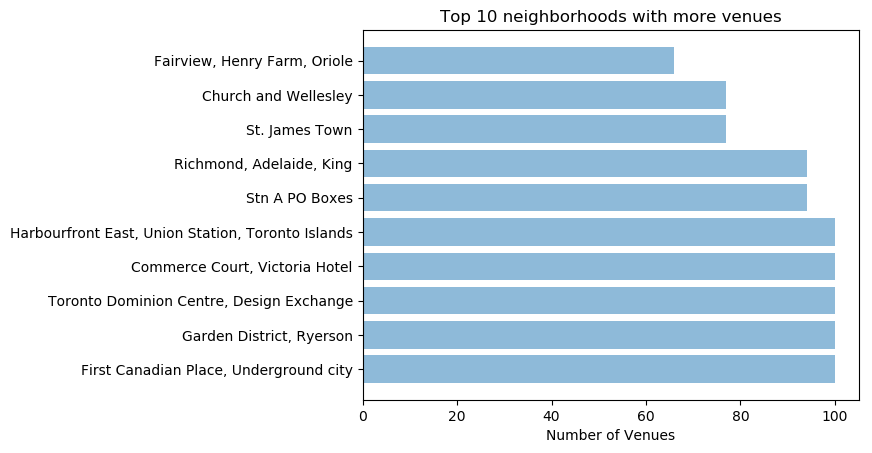

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = toronto_venues_counted5['Neighborhood']
y_pos = np.arange(len(objects))
performance = toronto_venues_counted5['Venue']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Venues')
plt.title('Top 10 neighborhoods with more venues')

plt.show()

In [31]:
# Finding out how many unique categories can be curated from all the returned values
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 264 uniques categories.


In [32]:
toronto_venues_counted=toronto_venues.groupby('Venue Category').count()
toronto_venues_counted1=toronto_venues_counted.reset_index()
toronto_venues_counted2=toronto_venues_counted1.sort_values('Venue', ascending=False)
toronto_venues_counted3=toronto_venues_counted2[['Venue Category', 'Venue']].head(20)
toronto_venues_counted3.head()

,Venue Category,Venue
62,Coffee Shop,176
51,Café,100
214,Restaurant,70
154,Italian Restaurant,48
198,Park,47


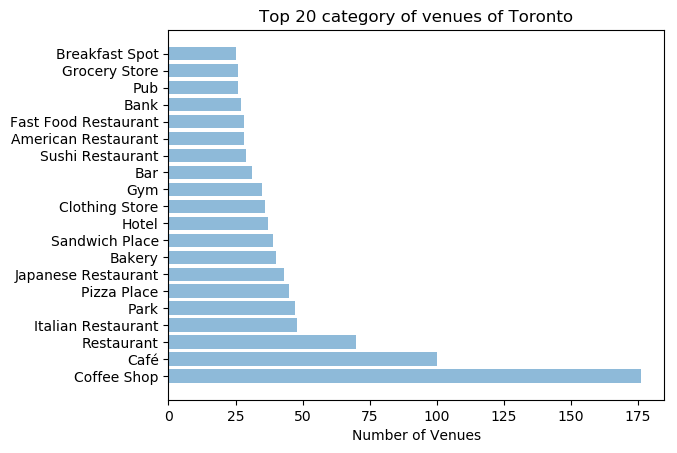

In [33]:
objects = toronto_venues_counted3['Venue Category']
y_pos = np.arange(len(objects))
performance = toronto_venues_counted3['Venue']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Venues')
plt.title('Top 20 category of venues of Toronto')

plt.show()

### Analyze each neighborhood

In [38]:
# One hot encoding
toronto_onehot=pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# Adding neighborhood column back to dataframe
toronto_onehot['Neighborhood']=toronto_venues['Neighborhood']
# Moving neighborhood column to the first column
fixed_columns=[toronto_onehot.columns[-1]]+list(toronto_onehot.columns[:-1])
toronto_onehot=toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Examining the new dataframe size
toronto_onehot.shape

(2116, 272)

In [40]:
# Grouping rows by neighborhood and by taking the mean of the frequency of ocurrence of each category
toronto_grouped=toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,Bayview Village,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.043478,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
5,Berczy Park,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
6,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
8,Business reply mail Processing Centre,0.000000,0.0,0.000000,0.000000,0.0000,0.000,0.000,0.000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.000000,0.062500,0.0625,0.125,0.125,0.125,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000


In [41]:
# Confirming the new size
toronto_grouped.shape

(93, 272)

In [64]:
# Printing each neighborhood along with the top 5 most common venues
num_top_venues=10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp=toronto_grouped[toronto_grouped['Neighborhood']==hood].T.reset_index()
    temp.columns=['venue', 'freq']
    temp=temp.iloc[1:]
    temp['freq']=temp['freq'].astype(float)
    temp=temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge   0.2
1             Breakfast Spot   0.2
2  Latin American Restaurant   0.2
3             Clothing Store   0.2
4               Skating Rink   0.2
5             Massage Studio   0.0
6          Martial Arts Dojo   0.0
7             Medical Center   0.0
8   Mediterranean Restaurant   0.0
9        Monument / Landmark   0.0


----Alderwood, Long Branch----
                venue  freq
0         Pizza Place  0.25
1         Coffee Shop  0.12
2                 Gym  0.12
3        Skating Rink  0.12
4            Pharmacy  0.12
5                 Pub  0.12
6      Sandwich Place  0.12
7       Metro Station  0.00
8   Mobile Phone Shop  0.00
9  Miscellaneous Shop  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.10
1                       Bank  0.10
2                   Pharmacy  0.05
3              Shopping Mall  0.05
4             Sandwich 

#### Putting that into a pandas dataframe

In [43]:
# Writing a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
# Creating the new dataframe and display the top 10 venues for each neighborhood
num_top_venues=10

indicators=['st', 'nd', 'rd']
# Creating columns according to number of top venues
columns=['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# Creating a new dataframe
neighborhoods_venues_sorted=pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood']=toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:]=return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Latin American Restaurant,Lounge,Breakfast Spot,Clothing Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run
1,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Coffee Shop,Pub,Pharmacy,Sandwich Place,Women's Store,Discount Store,Department Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Pharmacy,Deli / Bodega,Supermarket,Ice Cream Shop,Sushi Restaurant,Middle Eastern Restaurant,Restaurant,Diner
3,Bayview Village,Café,Chinese Restaurant,Bank,Japanese Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dessert Shop
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,Restaurant,Coffee Shop,Thai Restaurant,Butcher,Café,Indian Restaurant,Sushi Restaurant,Pizza Place


In [63]:
toronto_neighborhood10=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood']=='Toronto Dominion Centre, Design Exchange']
toronto_neighborhood10.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,1,"Toronto Dominion Centre, Design Exchange",Coffee Shop,Café,Hotel,Restaurant,Seafood Restaurant,Salad Place,Japanese Restaurant,Italian Restaurant,American Restaurant,Tea Room


#### Cluster Neighborhoods

In [46]:
# Setting number of clusters
kclusters=5
toronto_grouped_clustering=toronto_grouped.drop('Neighborhood', 1)
# Running k-means clustering
kmeans=KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
# Checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
# Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# Adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged=toronto_data
# Merging toronto_grouped with toronto_data to add Latitude/Longitude for each neighborhood
toronto_merged=toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#toronto_merged['Cluster Labels'] =toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,43.753259,-79.329656,2.0,Park,Food & Drink Shop,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Falafel Restaurant
1,North York,Victoria Village,43.725882,-79.315572,1.0,Hockey Arena,Intersection,Coffee Shop,Financial or Legal Service,French Restaurant,Portuguese Restaurant,Women's Store,Dim Sum Restaurant,Diner,Discount Store
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Bakery,Park,Breakfast Spot,Pub,Theater,Café,Health Food Store,Historic Site,Hotel
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Event Space,Gift Shop,Furniture / Home Store,Clothing Store,Coffee Shop,Miscellaneous Shop,Vietnamese Restaurant,Boutique,Accessories Store,Electronics Store
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Bar,Beer Bar,Sandwich Place,Burrito Place,Café,Park,College Auditorium


#### Examine Clusters
Examining each cluster and determine the discriminating venue categories that distinguisd each cluster.

In [82]:
# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels']==0, toronto_merged.columns[[1]+list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,Park,Fireworks Store,Food & Drink Shop,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
32,Scarborough Village,Convenience Store,Playground,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
35,East Toronto,Park,Coffee Shop,Convenience Store,Ethiopian Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Deli / Bodega
61,Lawrence Park,Park,Swim School,Bus Line,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
66,York Mills West,Park,Bank,Convenience Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Department Store,Doner Restaurant
83,"Moore Park, Summerhill East",Park,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
85,"Milliken, Agincourt North, Steeles East, L'Amo...",Park,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
91,Rosedale,Park,Playground,Trail,Electronics Store,Eastern European Restaurant,Ethiopian Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dance Studio
98,"The Kingsway, Montgomery Road, Old Mill North",Park,Smoke Shop,Pool,River,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


In [83]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels']==1, toronto_merged.columns[[1]+list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,Grocery Store,Coffee Shop,Hockey Arena,Portuguese Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Deli / Bodega
2,"Regent Park, Harbourfront",Coffee Shop,Bakery,Park,Café,Theater,Pub,Restaurant,Breakfast Spot,Shoe Store,Farmers Market
3,"Lawrence Manor, Lawrence Heights",Women's Store,Coffee Shop,Boutique,Miscellaneous Shop,Furniture / Home Store,Arts & Crafts Store,Clothing Store,Event Space,Accessories Store,Vietnamese Restaurant
4,"Queen's Park, Ontario Provincial Government",Coffee Shop,Sushi Restaurant,Distribution Center,Park,Music Venue,Mexican Restaurant,Juice Bar,Japanese Restaurant,Italian Restaurant,Hobby Shop
6,"Malvern, Rouge",Fast Food Restaurant,Print Shop,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
7,Don Mills,Gym,Asian Restaurant,Beer Store,Japanese Restaurant,Coffee Shop,Clothing Store,Restaurant,Bike Shop,Sandwich Place,Italian Restaurant
8,"Parkview Hill, Woodbine Gardens",Pizza Place,Café,Bank,Gym / Fitness Center,Pet Store,Pharmacy,Fast Food Restaurant,Gastropub,Athletics & Sports,Intersection
9,"Garden District, Ryerson",Clothing Store,Coffee Shop,Café,Cosmetics Shop,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant,Bookstore
10,Glencairn,Pizza Place,Bakery,Pub,Japanese Restaurant,Women's Store,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
13,Don Mills,Gym,Asian Restaurant,Beer Store,Japanese Restaurant,Coffee Shop,Clothing Store,Restaurant,Bike Shop,Sandwich Place,Italian Restaurant


In [85]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels']==2, toronto_merged.columns[[1]+list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"West Deane Park, Princess Gardens, Martin Grov...",Brewery,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant


In [88]:
# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels']==3, toronto_merged.columns[[1]+list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,"York Mills, Silver Hills",Cafeteria,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Deli / Bodega


In [89]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels']==4, toronto_merged.columns[[1]+list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Rouge Hill, Port Union, Highland Creek",Golf Course,Bar,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
